In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [5]:
inp=pd.read_csv("../PJ sensor.csv",usecols=[6,7,10,11])
out=pd.read_csv("../PJ sensor.csv",usecols=[2,3,4,5,8,9])

In [6]:
inp.head(5)

,Temperature,Relative Humidity,date,Time
0,31,65,191213,175844
1,31,65,191213,175904
2,31,65,191213,175924
3,31,65,191213,175944
4,31,66,191213,180004


In [7]:
out.head(5)

,NO2,O3,CO,SO2,PM2.5,PM10
0,-15.075377,35.714286,1766.233766,148.484848,11.229150,17.323938
1,-20.100503,41.208791,1733.766234,142.424242,9.413914,24.967407
2,-15.075377,43.956044,1711.038961,136.363636,10.350110,56.781536
3,0.000000,57.692308,1688.311688,139.393939,10.488765,30.371115
4,-20.100503,54.945055,1681.818182,130.303030,12.353048,188.026886


In [8]:
inp=np.array(inp)
out=np.array(out)

# Min Max Scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(inp)
Y1=scaler_obj.fit_transform(out)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [10]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [11]:
Y1.shape

(1627533, 1, 6)

# Model

In [12]:
inp=keras.Input(shape=(1,4))

l=keras.layers.Conv1D(6,1,padding="same",activation="relu",kernel_initializer="glorot_uniform")(inp)
 
output = keras.layers.Conv1D(6,4,padding="same",activation='sigmoid')(l)

model1=keras.Model(inputs=inp,outputs=output)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 conv1d (Conv1D)             (None, 1, 6)              30        
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 6)              150       
                                                                 
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

model_fit8 = model1.fit(x_train,y_train,batch_size=256,epochs=50, validation_split=0.1)

Epoch 1/50
4292/4292 [==============================] - 38s 6ms/step - loss: 0.1352 - accuracy: 0.8077 - mse: 0.1352 - mae: 0.3093 - rmse: 0.3675 - val_loss: 0.1242 - val_accuracy: 0.9971 - val_mse: 0.1242 - val_mae: 0.2960 - val_rmse: 0.3523
Epoch 2/50
4292/4292 [==============================] - 27s 6ms/step - loss: 0.1116 - accuracy: 0.9969 - mse: 0.1116 - mae: 0.2803 - rmse: 0.3337 - val_loss: 0.0984 - val_accuracy: 0.9971 - val_mse: 0.0984 - val_mae: 0.2633 - val_rmse: 0.3135
Epoch 3/50
4292/4292 [==============================] - 28s 6ms/step - loss: 0.0848 - accuracy: 0.9969 - mse: 0.0848 - mae: 0.2440 - rmse: 0.2905 - val_loss: 0.0714 - val_accuracy: 0.9971 - val_mse: 0.0714 - val_mae: 0.2240 - val_rmse: 0.2667
Epoch 4/50
4292/4292 [==============================] - 29s 7ms/step - loss: 0.0589 - accuracy: 0.9969 - mse: 0.0589 - mae: 0.2029 - rmse: 0.2415 - val_loss: 0.0472 - val_accuracy: 0.9971 - val_mse: 0.0472 - val_mae: 0.1819 - val_rmse: 0.2163
Epoch 5/50
4292/4292 [======

4292/4292 [==============================] - 28s 6ms/step - loss: 5.8872e-04 - accuracy: 0.9969 - mse: 5.8872e-04 - mae: 0.0143 - rmse: 0.0205 - val_loss: 5.8700e-04 - val_accuracy: 0.9971 - val_mse: 5.8700e-04 - val_mae: 0.0142 - val_rmse: 0.0205
Epoch 34/50
4292/4292 [==============================] - 28s 6ms/step - loss: 5.8813e-04 - accuracy: 0.9969 - mse: 5.8813e-04 - mae: 0.0143 - rmse: 0.0205 - val_loss: 5.8647e-04 - val_accuracy: 0.9971 - val_mse: 5.8647e-04 - val_mae: 0.0142 - val_rmse: 0.0204
Epoch 35/50
4292/4292 [==============================] - 30s 7ms/step - loss: 5.8761e-04 - accuracy: 0.9969 - mse: 5.8761e-04 - mae: 0.0142 - rmse: 0.0205 - val_loss: 5.8595e-04 - val_accuracy: 0.9971 - val_mse: 5.8595e-04 - val_mae: 0.0142 - val_rmse: 0.0204
Epoch 36/50
4292/4292 [==============================] - 30s 7ms/step - loss: 5.8714e-04 - accuracy: 0.9969 - mse: 5.8714e-04 - mae: 0.0142 - rmse: 0.0204 - val_loss: 5.8550e-04 - val_accuracy: 0.9971 - val_mse: 5.8550e-04 - val_mae

In [14]:
model1.evaluate(x_test,y_test)

12716/12716 [==============================] - 62s 5ms/step - loss: 5.8260e-04 - accuracy: 0.9970 - mse: 5.8260e-04 - mae: 0.0141 - rmse: 0.0203


[0.0005826040869578719,
 0.9970065355300903,
 0.0005826040869578719,
 0.014112371020019054,
 0.020336121320724487]

In [15]:
model1.evaluate(x_train,y_train)

38146/38146 [==============================] - 178s 5ms/step - loss: 5.8336e-04 - accuracy: 0.9970 - mse: 5.8336e-04 - mae: 0.0141 - rmse: 0.0203


[0.0005833641043864191,
 0.9969671964645386,
 0.0005833641043864191,
 0.014119859784841537,
 0.02034987136721611]

In [17]:
df1=pd.DataFrame(model_fit8.history['loss'],columns=["Loss"])
df1=df1.join(pd.DataFrame(model_fit8.history["val_loss"],columns=["Val Loss"]))
df1=df1.join(pd.DataFrame(model_fit8.history["accuracy"],columns=['Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_accuracy"],columns=['Val Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["mse"],columns=['MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["mae"],columns=['MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mae"],columns=['Val MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["rmse"],columns=['RMSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val RMSE']))
df1

,Loss,Val Loss,Accuracy,Val Accuracy,MSE,Val MSE,MAE,Val MAE,RMSE,Val RMSE
0,0.135206,0.124187,0.807741,0.997124,0.135206,0.124187,0.309277,0.296025,0.367481,0.124187
1,0.111598,0.098434,0.996950,0.997124,0.111598,0.098434,0.280279,0.263279,0.333677,0.098434
2,0.084803,0.071381,0.996950,0.997124,0.084803,0.071381,0.243978,0.223999,0.290528,0.071381
3,0.058877,0.047181,0.996950,0.997124,0.058877,0.047181,0.202949,0.181925,0.241530,0.047181
4,0.037210,0.028284,0.996950,0.997124,0.037210,0.028284,0.161038,0.140761,0.191240,0.028284
5,0.021296,0.015314,0.996950,0.997124,0.021296,0.015314,0.121662,0.103626,0.143696,0.015314
6,0.011022,0.007508,0.996950,0.997124,0.011022,0.007508,0.087481,0.072640,0.102251,0.007508
7,0.005202,0.003403,0.996950,0.997124,0.005202,0.003403,0.059991,0.048696,0.069103,0.003403
8,0.002338,0.001552,0.996950,0.997124,0.002338,0.001552,0.039663,0.031941,0.045298,0.001552
9,0.001149,0.000877,0.996950,0.997124,0.001149,0.000877,0.026434,0.022103,0.030868,0.000877


In [18]:
df1.to_excel("PJ_CNN.xlsx")

# Saving Model as File

In [ ]:
model_json = model1.to_json()
with open("cnnpj.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("cnnpj.h5")
print("Saved model to disk")

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

from keras.models import model_from_json
json_file = open('Model_File/cnnpj.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Model_File/cnnpj.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),loss='mse',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


In [20]:
loaded_model.evaluate(x_train, y_train)

38146/38146 [==============================] - 46s 1ms/step - loss: 5.8275e-04 - accuracy: 0.9970 - mse: 5.8275e-04 - mae: 0.0141 - rmse: 0.0203


[0.0005827538552694023,
 0.9969671964645386,
 0.0005827538552694023,
 0.014105264097452164,
 0.020329130813479424]

In [21]:
loaded_model.evaluate(x_test, y_test)

12716/12716 [==============================] - 15s 1ms/step - loss: 5.8197e-04 - accuracy: 0.9970 - mse: 5.8197e-04 - mae: 0.0141 - rmse: 0.0203


[0.0005819689249619842,
 0.9970065355300903,
 0.0005819689249619842,
 0.014097596518695354,
 0.020314402878284454]

# Error Analysis

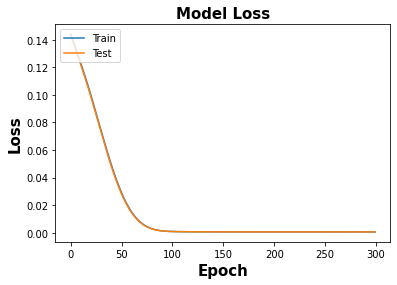

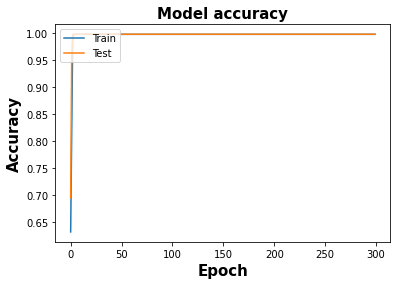

In [22]:
# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred

array([[[0.4525625 , 0.57145804, 0.03766721, 0.00737923, 0.05041179,
         0.00355402]],

       [[0.41261363, 0.55229   , 0.03267696, 0.00800288, 0.04310289,
         0.00338137]],

       [[0.4659784 , 0.57535595, 0.04162768, 0.00785238, 0.05570194,
         0.004049  ]],

       ...,

       [[0.40230873, 0.55303717, 0.03064063, 0.00778642, 0.03926936,
         0.00301138]],

       [[0.39737666, 0.5441218 , 0.03281525, 0.00908223, 0.04408705,
         0.00380024]],

       [[0.4423588 , 0.54866594, 0.0380438 , 0.00816682, 0.06486663,
         0.00507674]]], dtype=float32)

In [24]:
y_test

array([[[0.49655172, 0.61261671, 0.04625328, 0.00839927, 0.07680226,
         0.00349832]],

       [[0.40689655, 0.56779311, 0.02503314, 0.00862807, 0.03923826,
         0.00169898]],

       [[0.48275862, 0.61261671, 0.05669757, 0.01000087, 0.12197674,
         0.0061505 ]],

       ...,

       [[0.4       , 0.53897794, 0.02967504, 0.01022967, 0.04172884,
         0.01677347]],

       [[0.4137931 , 0.56779311, 0.03514586, 0.01114488, 0.06885241,
         0.003031  ]],

       [[0.48275862, 0.57739817, 0.06051056, 0.00908567, 0.10450044,
         0.00542992]]])

In [25]:
y_test=y_test[:,0]
y_test_pred=y_test_pred[:,0]

In [26]:
from numpy import savetxt
savetxt('ARRAY_DATA/cnn_y_test_pred.csv', y_test_pred[:1001], delimiter=',')

In [27]:
from numpy import savetxt
savetxt('ARRAY_DATA/cnn_y_test.csv', y_test[:1001], delimiter=',')

In [ ]:
#completed